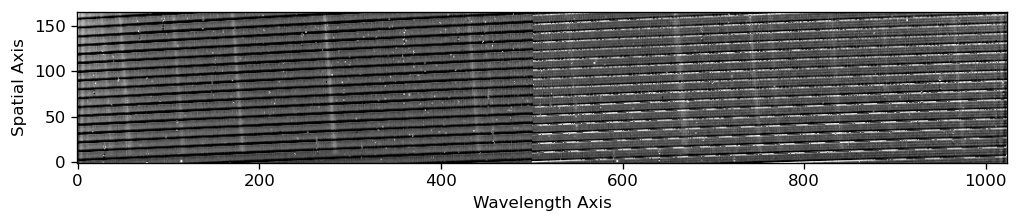

In [2]:
# import packages
from matplotlib import rcParams
rcParams['figure.dpi'] = 120
rcParams["savefig.dpi"] = 200
rcParams['figure.facecolor'] = 'w'

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lmfit import Model
from lmfit.models import PolynomialModel, QuadraticModel, LinearModel, ConstantModel
from lmfit import minimize, Parameters, fit_report

import os
import warnings
warnings.filterwarnings('ignore')


# path joining version for other paths
notebook_path = os.path.abspath('/Users/RuoyanWang/Documents/LEICESTER/h3p/code/')
filepath = os.path.join(os.path.dirname(notebook_path), '02jun17/spec/')


# define normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# define guassian function, credit to pen and pants IDL's Gaussfit in Python
def gaussian_fit(x, a0, a1, a2, a3, a4, a5): 
    """
    x = data array
    a0 = height of guassian
    a1 = pixel position of Gaussian peak
    a2 = width of Gaussian
    a3 = constant term
    a4 = linear term
    a5 = quadratic term
    
    note: fwhm = a2 * np.sqrt(2 * np.log(2)) * 2
    """
    z = (x - a1) / a2
    y = a0 * np.exp(-z**2 / a2) + a3 + a4 * x + a5 * x**2
    return y

# load skylines
# skylines = fits.open(filepath + 'skyandarc2.fits', ignore_missing_end=True)[0].data
skylines = fits.open(filepath + 'order32/skylines60p_order32.fits', ignore_missing_end=True)[0].data

plt.figure(figsize=(10,2))
# plt.imshow(skylines, aspect='auto', extent=[0, 1089, 364, 225], cmap='gist_gray')
plt.imshow(skylines, cmap='gist_gray')
plt.xlabel('Wavelength Axis')
plt.ylabel('Spatial Axis')
plt.gca().invert_yaxis()

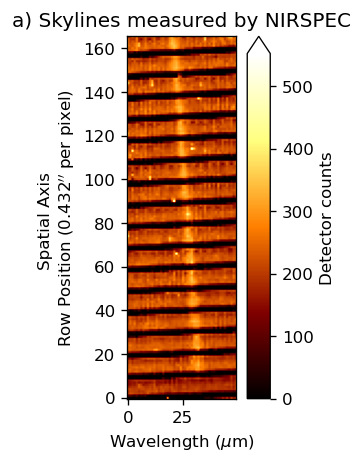

In [3]:
a = np.delete(skylines, np.s_[200:], 1)
b = np.delete(a, np.s_[:150], 1)

plt.figure()
plt.imshow(b, cmap='afmhot')
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Spatial Axis \nRow Position (0.432$^{\prime\prime}$ per pixel)')
plt.title('a) Skylines measured by NIRSPEC')
plt.gca().invert_yaxis()
plt.colorbar(extend='max', aspect=15, pad=0.02, label='Detector counts')

i = 15
i = 25
i = 35
i = 45
i = 55
i = 65
i = 75
i = 85
i = 95
i = 105
i = 115
i = 125
i = 135
i = 145
i = 155
i = 165


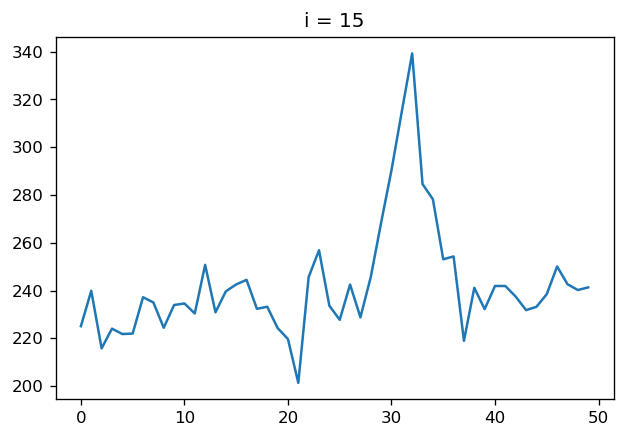

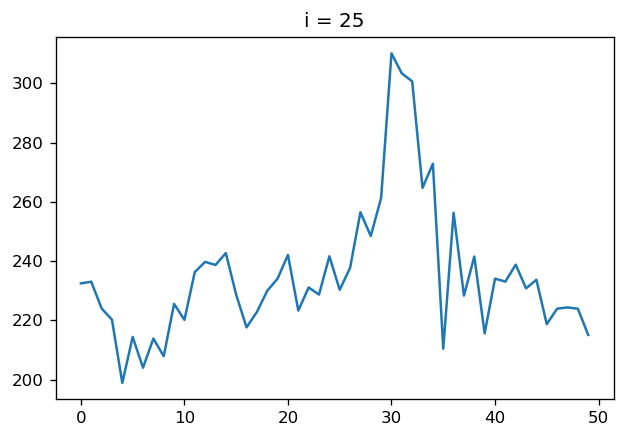

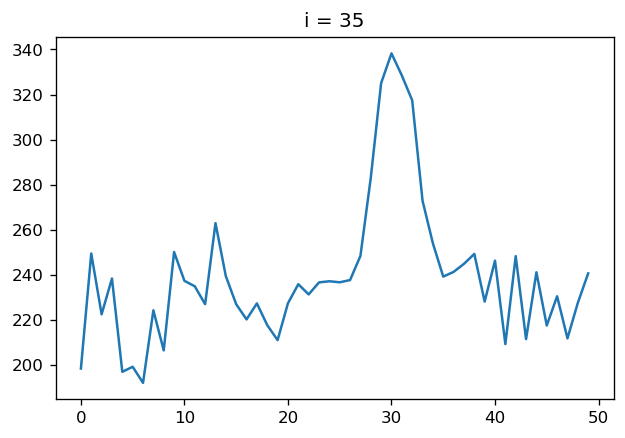

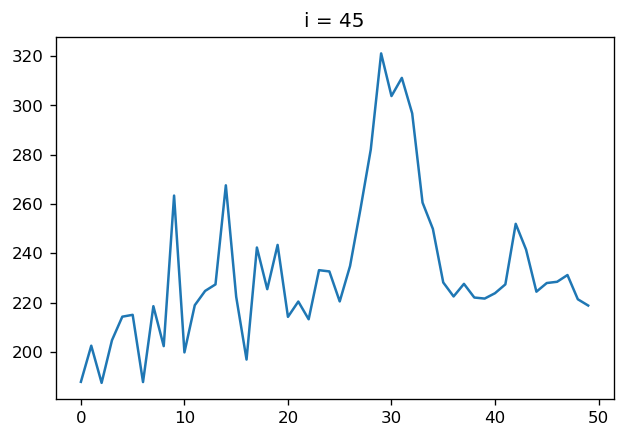

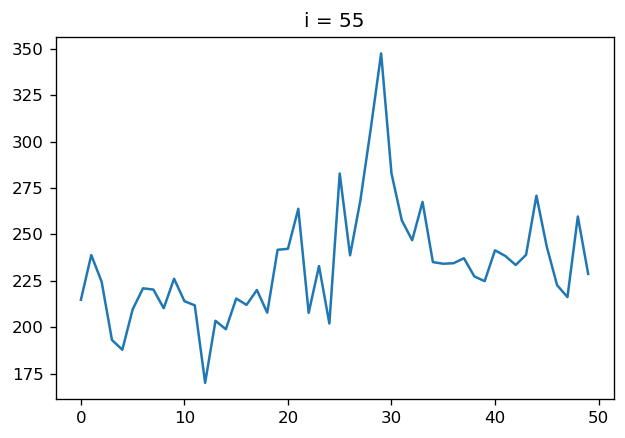

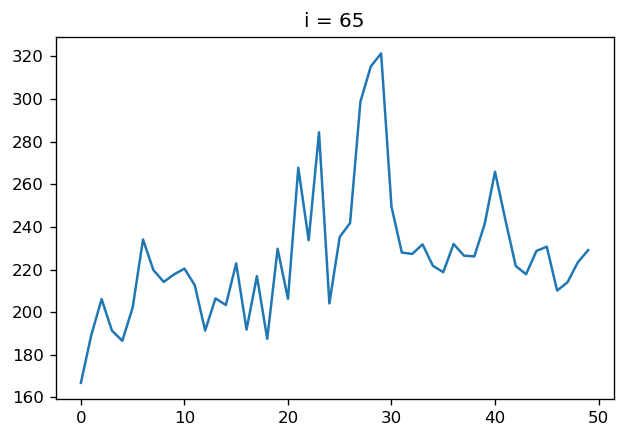

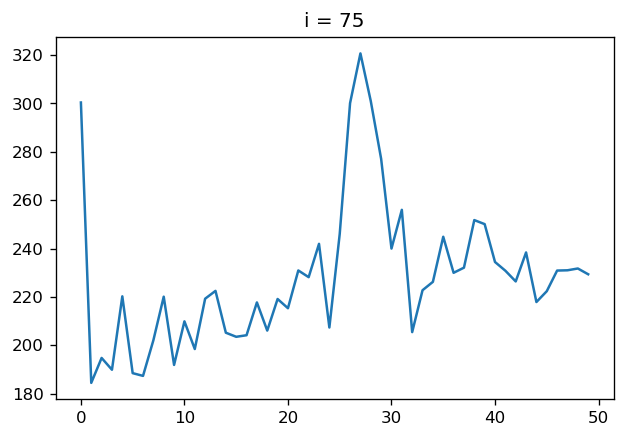

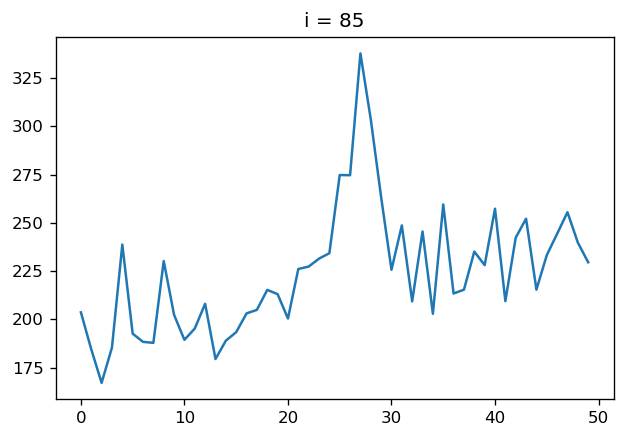

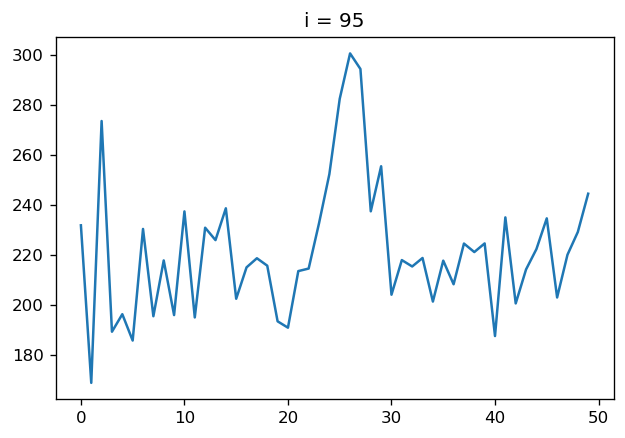

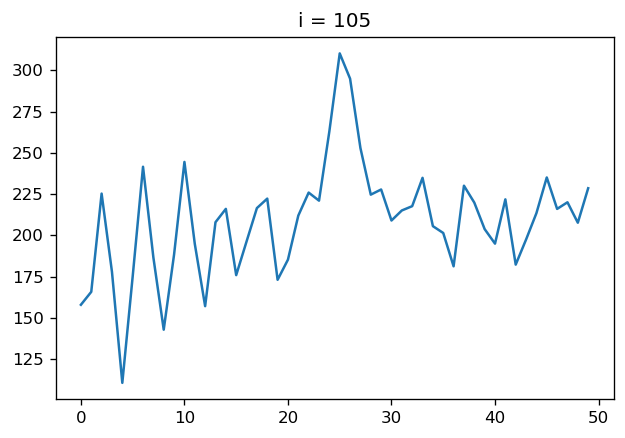

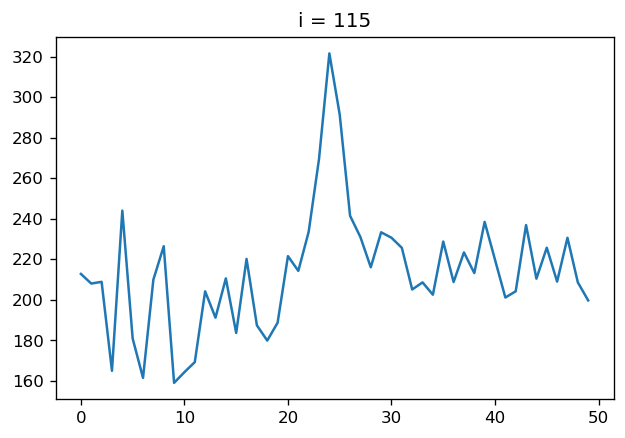

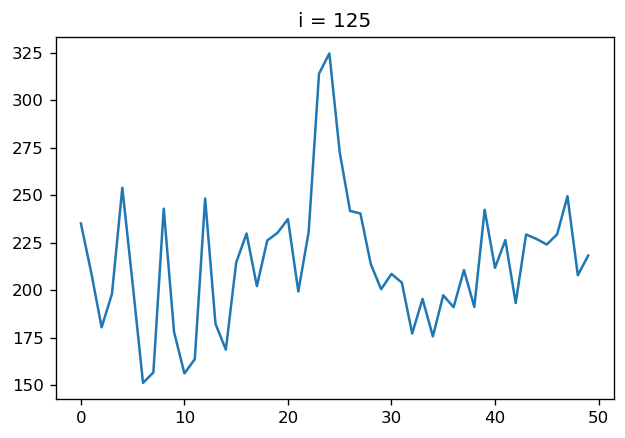

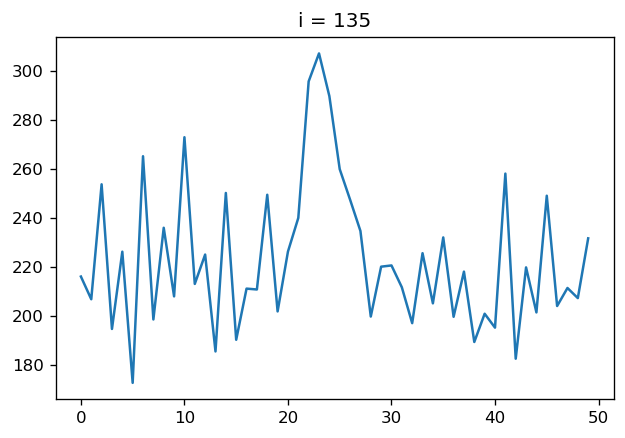

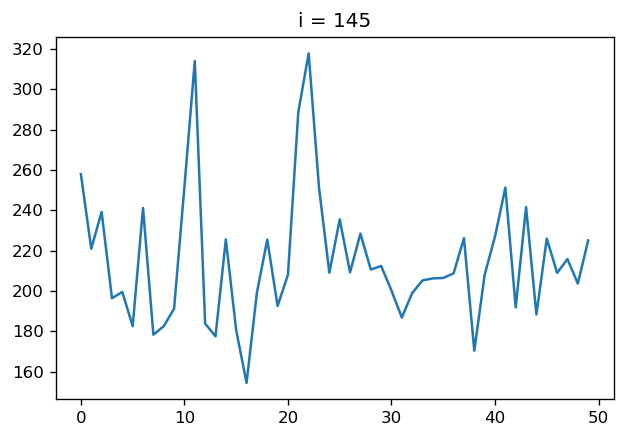

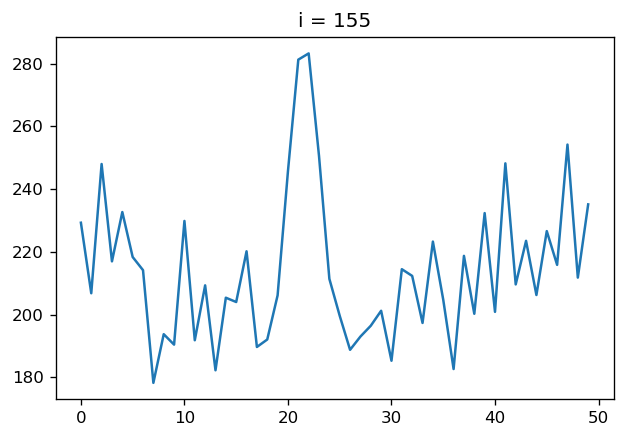

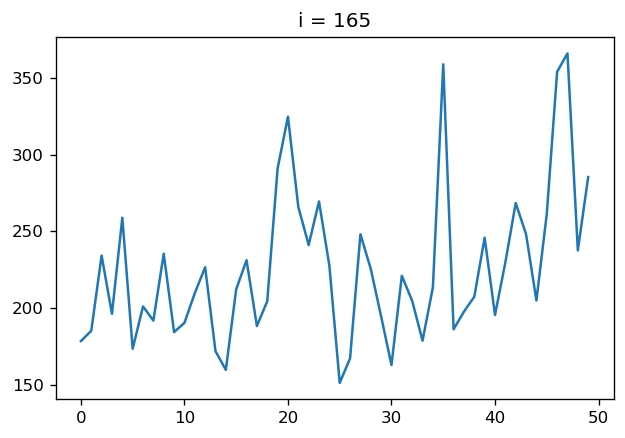

In [4]:
for i in range(len(b)):
    if i%5 == 0 and i%10 != 0 and i!= 5:
        print ('i = ' +str(i))
        plt.figure()
        plt.plot(b[i])
        plt.title('i = ' +str(i))

In [5]:
a = np.delete(skylines, np.s_[200:], 1)
b = np.delete(a, np.s_[:150], 1)
b = normalize(b)

waveaxis = np.linspace(0 ,np.size(b,1)-1, np.size(b,1))
# waveaxis = waverange[110:170]*100000

upper_skyline = 165
lower_skyline = 0

sky1_a1 = []

for i in range(lower_skyline, upper_skyline):
    if i%5 == 0 and i%10 != 0 and i!= 5 and i<= 75:
        # create lmfit model with defined gaussian
        sky1_model = Model(gaussian_fit)

        # create parameters and add initial guess
        sky1_params = sky1_model.make_params()
        sky1_params.add('a0', value=0.7)
        sky1_params.add('a1', value=30)
        sky1_params.add('a2', value=1)
        sky1_params.add('a3', value=0.3)
        sky1_params.add('a4', value=0)
        sky1_params.add('a5', value=0)
    
        try:
            sky1_fit_result = sky1_model.fit(b[i], sky1_params, x=waveaxis)
        except:
            print('Error occured at i=' + str(i))
            #print(sky1_fit_result.fit_report())
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(waveaxis, b[i])
            plt.plot(waveaxis, sky1_fit_result.best_fit, 'r-', label='best fit')
            
        sky1_a1.append(sky1_fit_result.params['a1'].value)
        
    if i%5 == 0 and i%10 != 0 and i!= 5 and i>= 75 and i<=135:
        # create lmfit model with defined gaussian
        sky1_model = Model(gaussian_fit)

        # create parameters and add initial guess
        sky1_params = sky1_model.make_params()
        sky1_params.add('a0', value=0.7)
        sky1_params.add('a1', value=25)
        sky1_params.add('a2', value=1)
        sky1_params.add('a3', value=0.3)
        sky1_params.add('a4', value=0)
        sky1_params.add('a5', value=0)
    
        try:
            sky1_fit_result = sky1_model.fit(b[i], sky1_params, x=waveaxis)
        except:
            print('Error occured at i=' + str(i))
            #print(sky1_fit_result.fit_report())
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(waveaxis, b[i])
            plt.plot(waveaxis, sky1_fit_result.best_fit, 'r-', label='best fit')
            
        sky1_a1.append(sky1_fit_result.params['a1'].value)
        
    if i%5 == 0 and i%10 != 0 and i!= 5 and i>= 135:
        # create lmfit model with defined gaussian
        sky1_model = Model(gaussian_fit)

        # create parameters and add initial guess
        sky1_params = sky1_model.make_params()
        sky1_params.add('a0', value=0.7)
        sky1_params.add('a1', value=23)
        sky1_params.add('a2', value=1)
        sky1_params.add('a3', value=0.3)
        sky1_params.add('a4', value=0)
        sky1_params.add('a5', value=0)
    
        try:
            sky1_fit_result = sky1_model.fit(b[i], sky1_params, x=waveaxis)
        except:
            print('Error occured at i=' + str(i))
            #print(sky1_fit_result.fit_report())
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(waveaxis, b[i])
            plt.plot(waveaxis, sky1_fit_result.best_fit, 'r-', label='best fit')
            
        sky1_a1.append(sky1_fit_result.params['a1'].value)
sky1_a1 = np.array(sky1_a1)+150

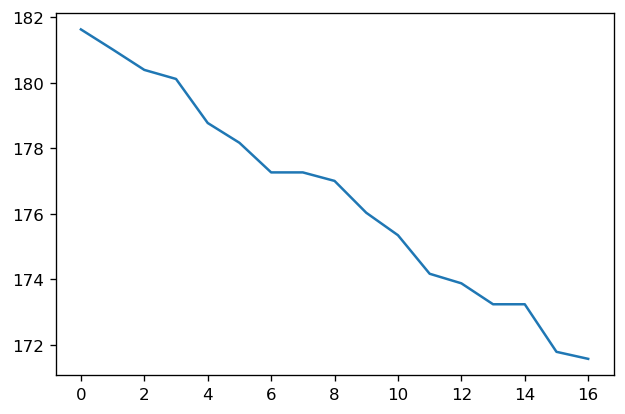

In [6]:
plt.plot(sky1_a1)

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 17
    # variables        = 2
    chi-square         = 1.48817052
    reduced chi-square = 0.09921137
    Akaike info crit   = -37.4063189
    Bayesian info crit = -35.7398922
[[Variables]]
    slope:     -0.06771526 +/- 0.00166333 (2.46%) (init = -0.06771526)
    intercept:  182.619170 +/- 0.16806564 (0.09%) (init = 182.6192)
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept) = -0.891


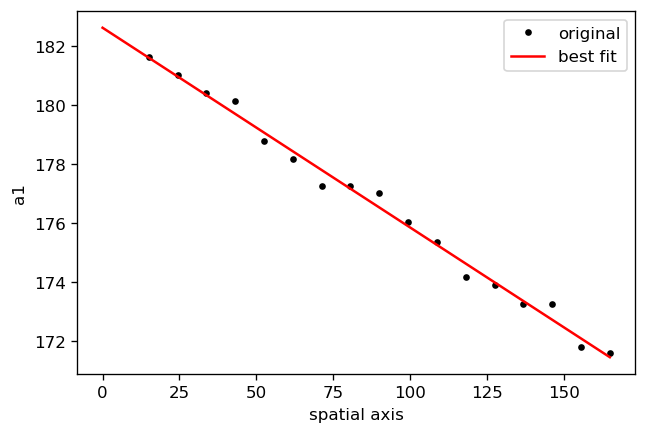

In [10]:
sky1_spat = np.linspace(15, 165, len(sky1_a1))
x = sky1_spat
y = sky1_a1

mod = LinearModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.25))

slope = out.params['slope'].value
intercept = out.params['intercept'].value

sky1_spat_all = np.linspace(0, 165, 166)
sky1_a1_best_fit = slope*sky1_spat_all + intercept

plt.figure()
plt.plot(sky1_spat, sky1_a1,'.k', label = 'original')
plt.plot(sky1_spat_all, sky1_a1_best_fit, 'r', label = 'best fit')
plt.xlabel('spatial axis')
plt.ylabel('a1')
plt.ticklabel_format(useOffset=False)
plt.legend()

In [13]:
sky1_a1_best_fit

array([182.61916954, 182.55145428, 182.48373902, 182.41602377,
       182.34830851, 182.28059325, 182.21287799, 182.14516273,
       182.07744748, 182.00973222, 181.94201696, 181.8743017 ,
       181.80658644, 181.73887119, 181.67115593, 181.60344067,
       181.53572541, 181.46801015, 181.4002949 , 181.33257964,
       181.26486438, 181.19714912, 181.12943386, 181.06171861,
       180.99400335, 180.92628809, 180.85857283, 180.79085757,
       180.72314232, 180.65542706, 180.5877118 , 180.51999654,
       180.45228128, 180.38456603, 180.31685077, 180.24913551,
       180.18142025, 180.11370499, 180.04598974, 179.97827448,
       179.91055922, 179.84284396, 179.7751287 , 179.70741345,
       179.63969819, 179.57198293, 179.50426767, 179.43655241,
       179.36883716, 179.3011219 , 179.23340664, 179.16569138,
       179.09797612, 179.03026087, 178.96254561, 178.89483035,
       178.82711509, 178.75939983, 178.69168458, 178.62396932,
       178.55625406, 178.4885388 , 178.42082354, 178.35

In [16]:
sky1_pixel_offset_order32 = 176.097841 - sky1_a1_best_fit
np.savetxt('sky1_pixel_offset_order32.txt', sky1_pixel_offset_order32)
sky1_pixel_offset_order32

array([-6.52132854, -6.45361328, -6.38589802, -6.31818277, -6.25046751,
       -6.18275225, -6.11503699, -6.04732173, -5.97960648, -5.91189122,
       -5.84417596, -5.7764607 , -5.70874544, -5.64103019, -5.57331493,
       -5.50559967, -5.43788441, -5.37016915, -5.3024539 , -5.23473864,
       -5.16702338, -5.09930812, -5.03159286, -4.96387761, -4.89616235,
       -4.82844709, -4.76073183, -4.69301657, -4.62530132, -4.55758606,
       -4.4898708 , -4.42215554, -4.35444028, -4.28672503, -4.21900977,
       -4.15129451, -4.08357925, -4.01586399, -3.94814874, -3.88043348,
       -3.81271822, -3.74500296, -3.6772877 , -3.60957245, -3.54185719,
       -3.47414193, -3.40642667, -3.33871141, -3.27099616, -3.2032809 ,
       -3.13556564, -3.06785038, -3.00013512, -2.93241987, -2.86470461,
       -2.79698935, -2.72927409, -2.66155883, -2.59384358, -2.52612832,
       -2.45841306, -2.3906978 , -2.32298254, -2.25526729, -2.18755203,
       -2.11983677, -2.05212151, -1.98440625, -1.916691  , -1.84